Customer Segmentation

Customer segmentation is the practice of dividing a company's customers into groups that reflect similarity among customers in each group. The goal of segmenting customers is to decide how to relate to customers in each segment in order to maximize the value of each customer to the business.

Once you have these segments, you can build the right product, set the right distribution and positioning, and match the right sales motion to each customer, while also refining your segments over time. Done well, it’s a model that gives anyone at your company an immediate understanding of your customers.

In [54]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns 

In [55]:
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
#conda install plotly

In [56]:
#Reading data
df = pd.read_csv('Mall_Customers.csv')

In [57]:
#Exploratory Data Analysis
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [58]:
df.shape

(200, 5)

In [59]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [60]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [61]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [62]:
#Converting Gender column to numerical column
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes
df.head(4)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77


In [63]:
#1-Male and 0-Female

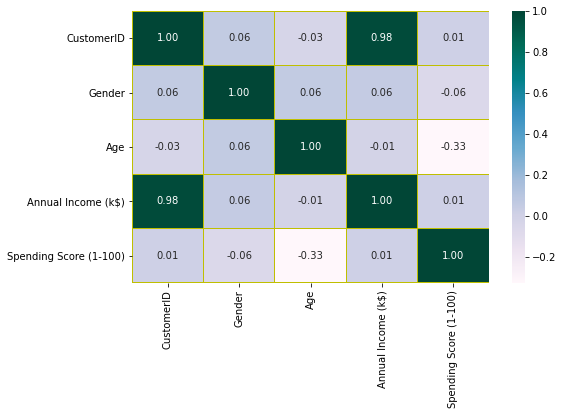

In [64]:
#Heatmap to visualise each factors correlation
fig,ax = plt.subplots(figsize = (8,5))
sns.heatmap(df.corr(), ax = ax, annot = True, linewidths= 0.05, fmt = '.2f',cmap='PuBuGn',linecolor='y')
plt.show()

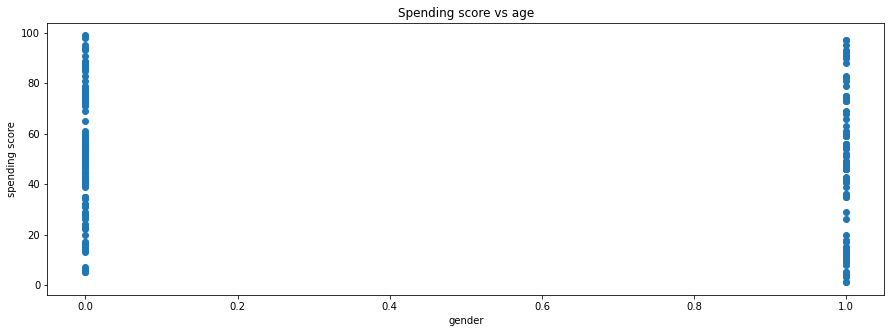

In [65]:
plt.scatter(df['Gender'],df['Spending Score (1-100)'])
plt.ylabel('spending score')
plt.xlabel('gender')
plt.title('Spending score vs age')
plt.show()

In [66]:
#Females tend to slightly spend higher than men.

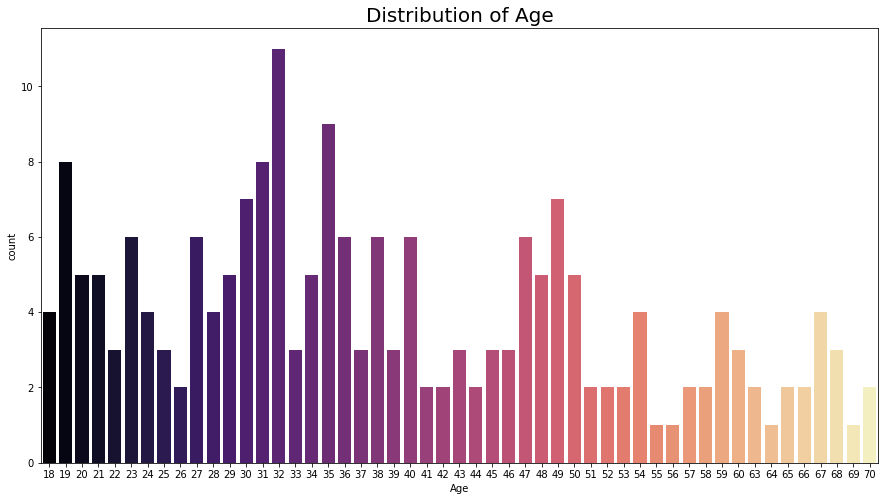

In [67]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['Age'], palette = 'magma')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

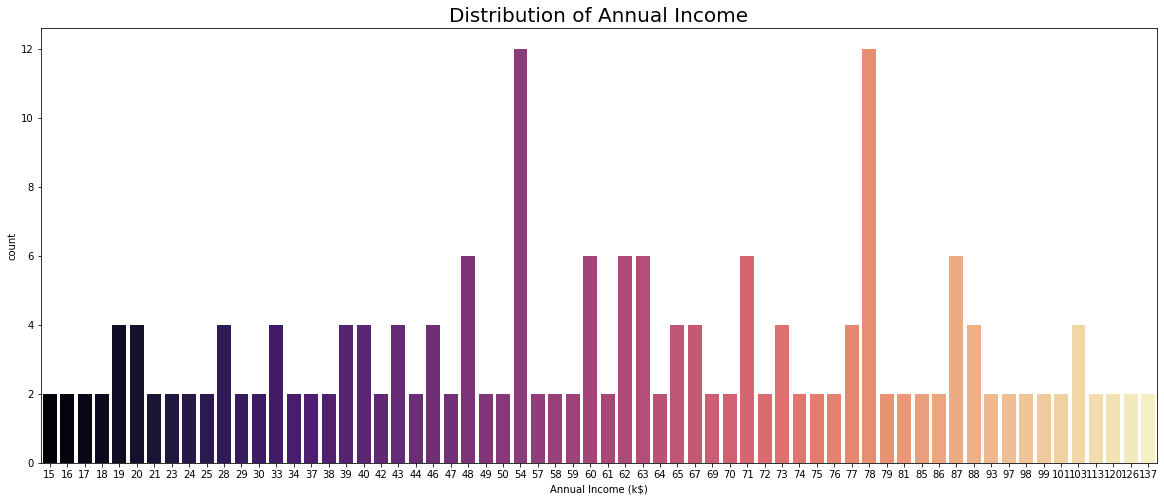

In [68]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(df['Annual Income (k$)'], palette = 'magma')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

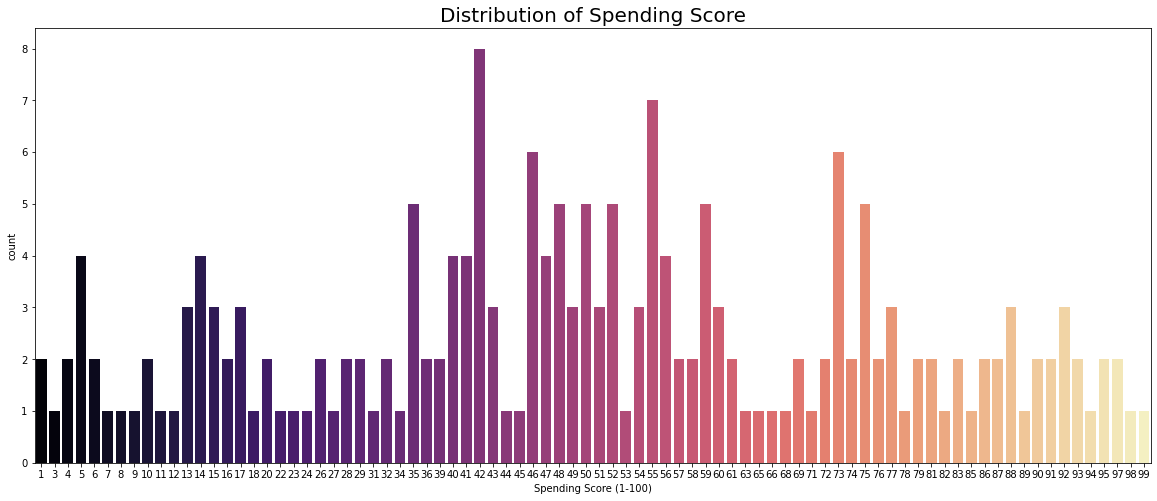

In [69]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(df['Spending Score (1-100)'], palette = 'magma')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

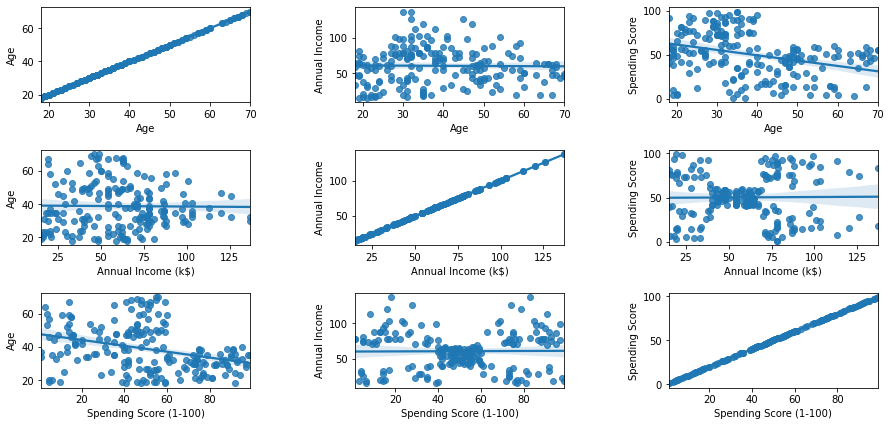

In [70]:
#Ploting the Relation between Age , Annual Income and Spending Score
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

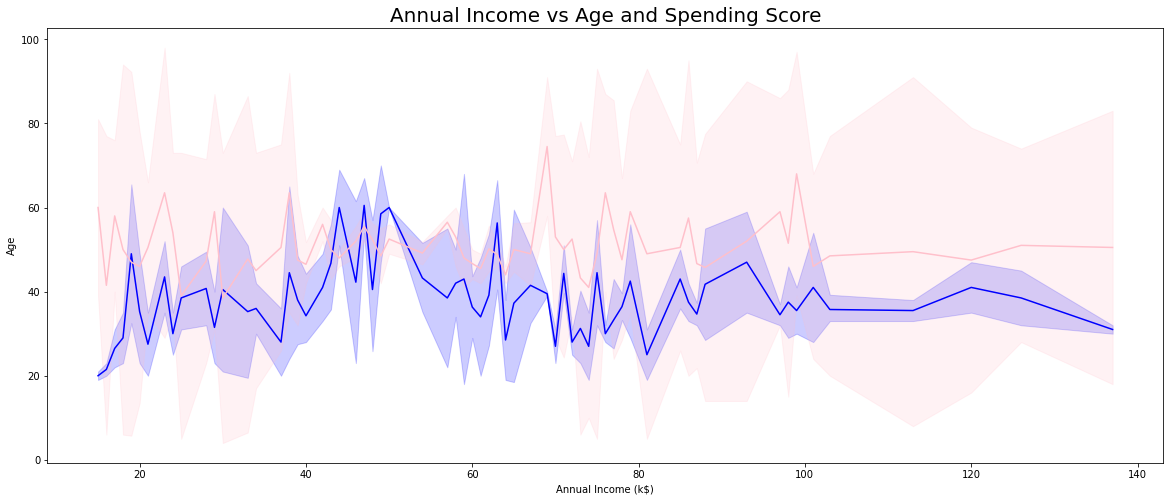

In [71]:
x = df['Annual Income (k$)']
y = df['Age']
z = df['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

The above Plot Between Annual Income and Age represented by a blue color line, and a plot between Annual Income and the Spending Score represented by a pink color. shows how Age and Spending Varies with Annual Income.

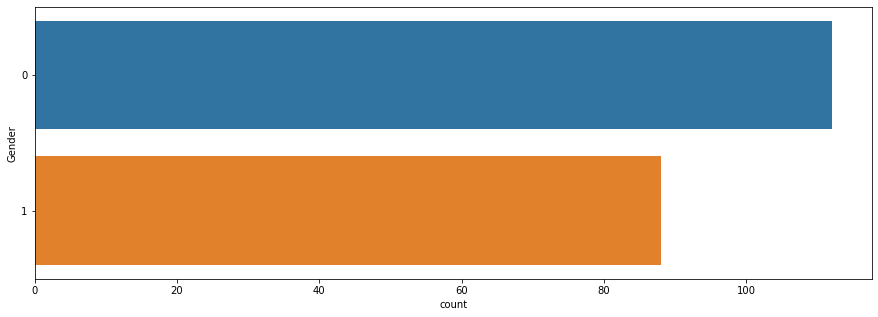

In [72]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

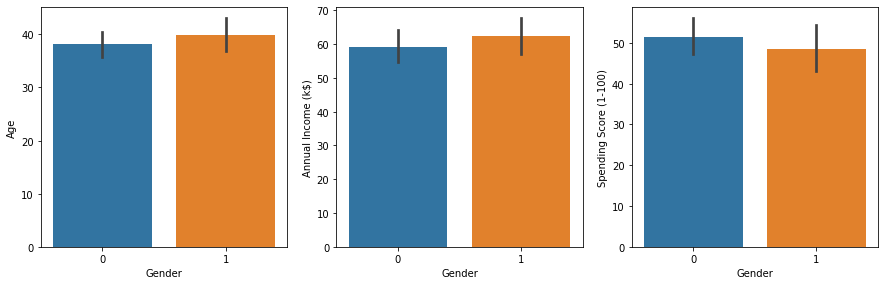

In [73]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3,3,1)
sns.barplot(y='Age',x='Gender', data=df);
ax2 = fig.add_subplot(3,3,2)
sns.barplot(y='Annual Income (k$)',x='Gender', data=df);
ax3 = fig.add_subplot(3,3,3)
sns.barplot(y='Spending Score (1-100)',x='Gender', data=df)

In [74]:
#Clearly,majority of the mall customers were males but femalers spended more.
#Also there is gender balance between all features.Else our results have chances of being skewed and would favour the majority

Clustering using K- means

In [75]:
### Feature sleection for the model
#Considering only 2 features (Age and Spending Score) and no Label available

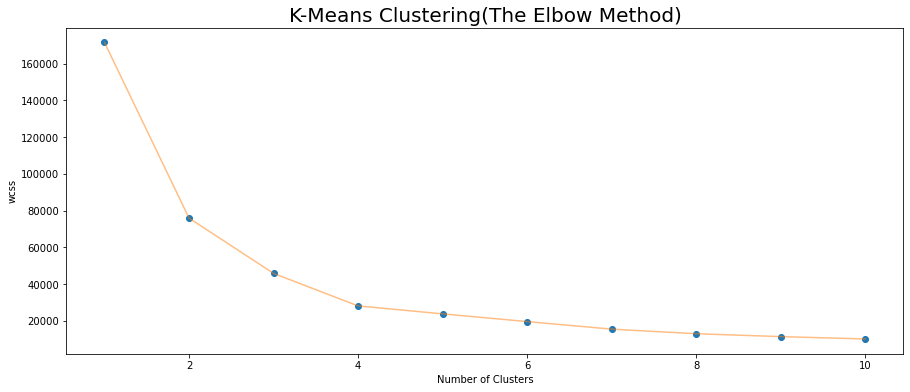

In [76]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
'''Age and spending Score'''
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
wcss = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    wcss.append(algorithm.inertia_)
#Visualizing the ELBOW method to get the optimal value of K     
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , wcss , 'o')
plt.plot(np.arange(1 , 11) , wcss , '-' , alpha = 0.5)
plt.rcParams['figure.figsize'] = (15, 5)
plt.xlabel('Number of Clusters') , plt.ylabel('wcss')
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.show()    

In [77]:
#If you zoom out this curve then you will see that last elbow comes at k=5
#no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,11)
##Finally we got that k=4

#Model Build
kmeans = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
y_kmeans=kmeans.fit_predict(X1)


#For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"
#y_kmeans is the final model . Now how and where we will deploy this model in production is depends on what tool we are using.
#This use case is very common and it is used in BFS industry(credit card) and retail for customer segmentation.


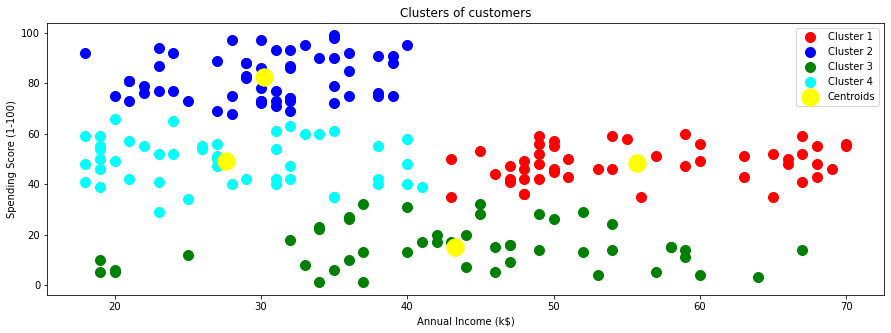

In [78]:
#Visualizing all the clusters 

plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X1[y_kmeans == 2, 0], X1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X1[y_kmeans == 3, 0], X1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

2. Segmentation using Annual Income and Spending Score

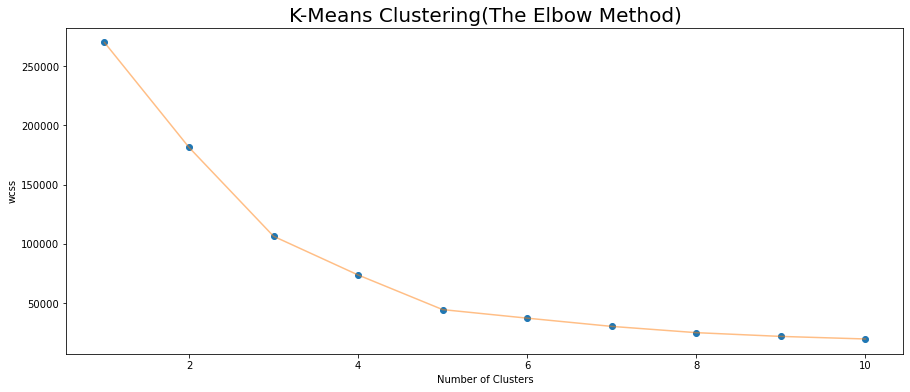

In [81]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
'''Annual Income and spending Score'''
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

wcss = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', random_state= 5  ) )
    algorithm.fit(X2)
    wcss.append(algorithm.inertia_)
#Visualizing the ELBOW method to get the optimal value of K     
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , wcss , 'o')
plt.plot(np.arange(1 , 11) , wcss , '-' , alpha = 0.5)
plt.rcParams['figure.figsize'] = (15, 5)
plt.xlabel('Number of Clusters') , plt.ylabel('wcss')
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.show()   

In [86]:
#If you zoom out this curve then you will see that last elbow comes at k=5
#no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,11)
##Finally we got that k=5

#Model Build
kmeans = (KMeans(n_clusters = 5 ,init='k-means++',random_state= 5 ) )
y2_kmeans=kmeans.fit_predict(X2)


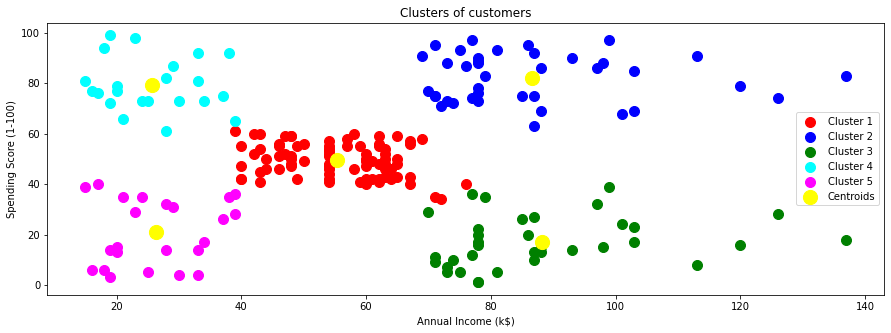

In [87]:
#Visualizing all the clusters 

plt.scatter(X2[y2_kmeans == 0, 0], X2[y2_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X2[y2_kmeans == 1, 0], X2[y2_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X2[y2_kmeans == 2, 0], X2[y2_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X2[y2_kmeans == 3, 0], X2[y2_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X2[y2_kmeans == 4, 0], X2[y2_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
######We can put Cluster 2 into some alerting system where email can be send to them on daily basis as these re easy to converse 
#######wherein others we can set like once in a week or once in a month..

Hierarchial clustering

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other

In [88]:
x = df.iloc[:, [3, 4]].values

# let's check the shape of x
print(x.shape)

(200, 2)


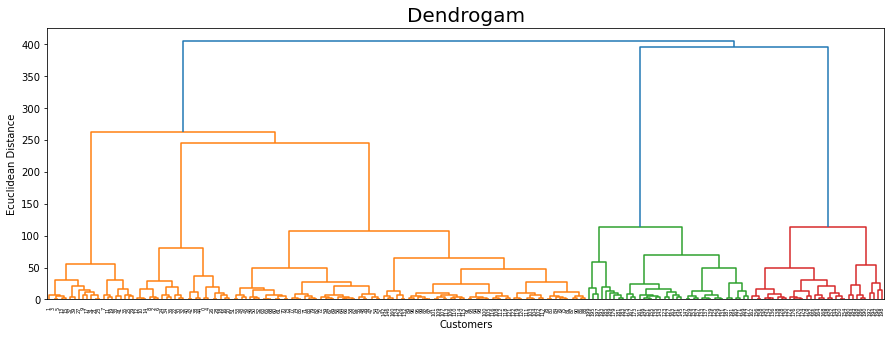

In [89]:
#Try dendogram for finding optimum number of clusters
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

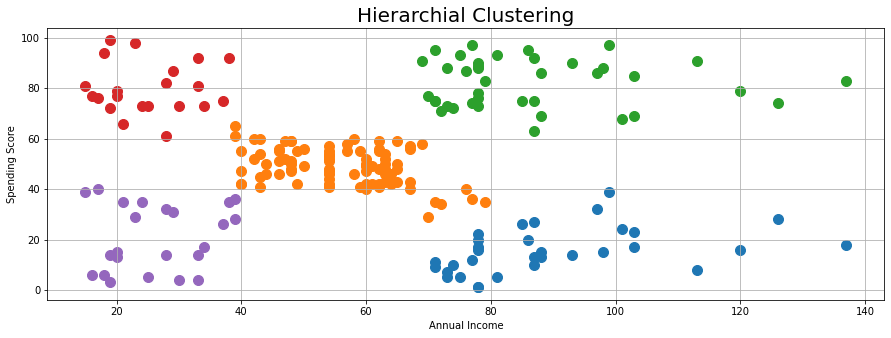

In [90]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)


plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100)
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100)
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100)
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100)
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100)

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid()
plt.show()